# Stock Market Candle Trend

A chart in the stock market usually uses candles to present the values at a specific time.
If the chart presents an asset in a daily time frame, for example, then every day will be represented per one candle. Usually, it uses colors to show if the candle is positive or negative. A positive candle is a candle that has a `Close` value bigger than the `Open` value. A negative candle is when the `Close` value is smaller than the `Open` value.

Below an example of a chart where the green candle are positive and the red are negative.

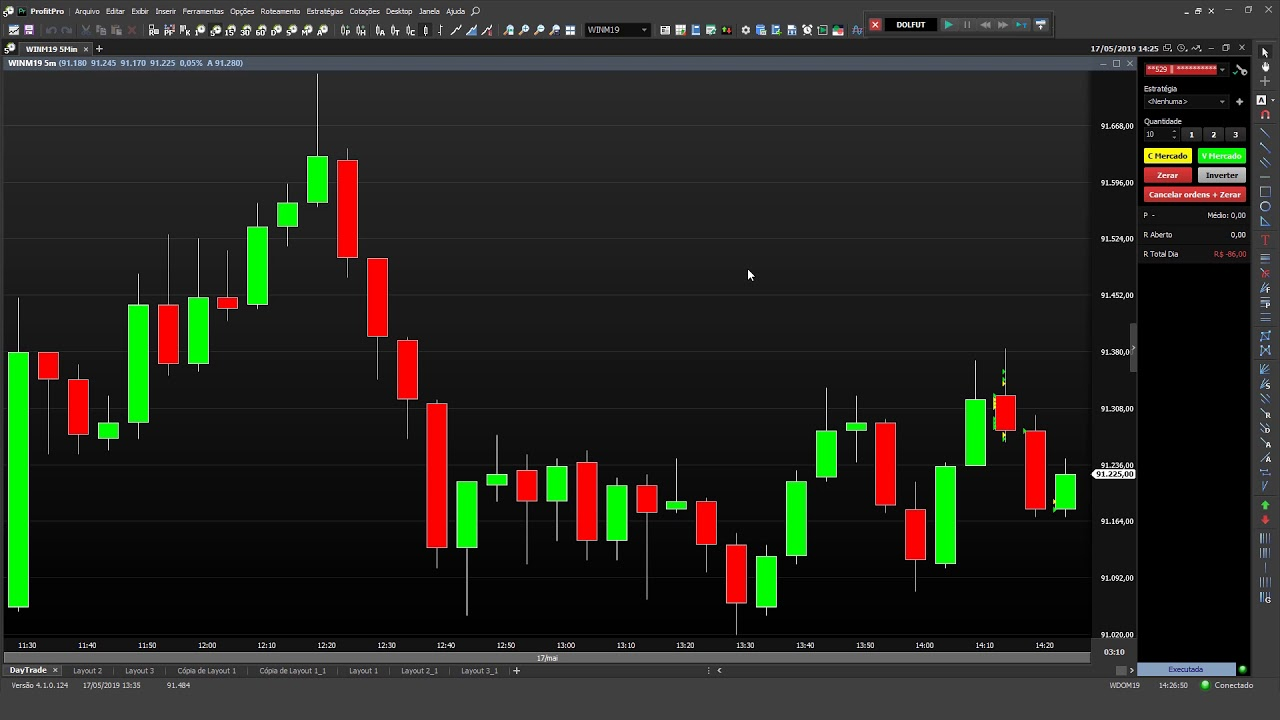

Evaluating the image above is possible to notice that after a positive candle sometimes it have one, two, or more positive candles, and sometimes we have a negative candle. The same happens to a negative candle.

In this study, we want to see what the frequency of has a different candle after the current one. If the last candle was positive what is the probability that the next one is positive and what is the probability of the next one to be negative. We want to verify what is the probability to have the same candle, positive or negative, in a row. For example, have two, three, or more candles positive or negative in a row.

To verify those events this study will evaluate the Brazilian mini index in the daily time frame.

## Load libraries

In [1]:
# Load libraries

import pandas as pd
import os

## Load data for the Brazilian mini index from 10/20/2014 to 10/30/2020

In [2]:
# Load data
os.chdir('/Users/morais.rm/Projects/Personal/DataScience/portifolio')

win = pd.read_csv('WIN$_Daily_201410200000_202010300000.csv', sep = '\t')

win.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Tick_vol', 'Vol', 'Spread']
win.head()

,Date,Open,High,Low,Close,Tick_vol,Vol,Spread
0,2014.10.20,76665,77282,75472,76172,141387,342239,0
1,2014.10.21,73039,73946,72116,72941,163626,394149,0
2,2014.10.22,72628,73998,72213,72448,142727,345869,0
3,2014.10.23,71873,72122,69177,70022,174140,422085,0
4,2014.10.24,70547,73688,70078,71398,186986,477306,0


## Cleaning data

In [3]:
# Removing columns unnecessary for the study
win = win[['Date', 'Open', 'Close']]

In [4]:
# Looking for NaN
win.isnull().sum()

Date     0
Open     0
Close    0
dtype: int64

The data doesn't have any null or NaN data.

In [5]:
# Data statistics
win.describe()

,Open,Close
count,1471.000000,1471.000000
mean,81380.554045,81450.523453
std,15690.233130,15540.871502
min,1001.000000,48032.000000
25%,70210.000000,70162.500000
50%,78096.000000,78144.000000
75%,94100.000000,94328.500000
max,119895.000000,119785.000000


The data above has a strange value to the `Open` column. The minimun value is `1001.00` which is too different comparing other values.<br/>
Let's investigate it.

In [6]:
win[win.Open == 1001]

,Date,Open,Close
1207,2019.10.08,1001,100596


In [7]:
win.iloc[1200:1215,]

,Date,Open,Close
1200,2019.09.27,106369,106325
1201,2019.09.30,106575,105919
1202,2019.10.01,106001,104862
1203,2019.10.02,104081,101832
1204,2019.10.03,102237,102341
1205,2019.10.04,101965,103240
1206,2019.10.07,102897,101392
1207,2019.10.08,1001,100596
1208,2019.10.09,101587,102152
1209,2019.10.10,101889,103079


Examining this day is possible to notice that the `Open` value doesn't make any sense.<br/>
To solve this problem we have 3 options:
<ul>
    <li>Remove the line with the problem</li>
    <li>Change the `Open` value to the same to as `Close` value to make this line not positive either negative</li>
    <li>Investigate what was the real values to this day</li>
</ul>

In [8]:
win.loc[1207,'Open'] = 100096
win.loc[1207,]

Date     2019.10.08
Open         100096
Close        100596
Name: 1207, dtype: object

Searching on the internet is possible to find the correct value and then we update that in our dataset.

## Categorizing candles as positive, negative, or neutral

In [9]:
win['Direction'] = win.apply((lambda row:
                              'Positive' if row['Open'] < row['Close'] else 'Negative' if row['Open'] > row['Close'] else 'Neutral'
                             ), axis = 1)

win.head(10)

,Date,Open,Close,Direction
0,2014.10.20,76665,76172,Negative
1,2014.10.21,73039,72941,Negative
2,2014.10.22,72628,72448,Negative
3,2014.10.23,71873,70022,Negative
4,2014.10.24,70547,71398,Positive
5,2014.10.27,66160,70153,Positive
6,2014.10.28,70535,71950,Positive
7,2014.10.29,71259,71129,Negative
8,2014.10.30,71423,72386,Positive
9,2014.10.31,73614,75829,Positive


Now is possible to know when a candle was positive, negative, or neutral (`Open` and `Close` values are equal).

In [10]:
win['Direction'].value_counts()

Positive    737
Negative    732
Neutral       2
Name: Direction, dtype: int64

The dataset has in total 1471 candles where only 2 are neutral. The dataset has almost 50/50 for positive and negative candles.<br/>
It is expected in a big sample because the stock market is a <a href='https://en.wikipedia.org/wiki/Random_walk_hypothesis' target='_blank'>random walk</a>.

## Counting the candles trend

In [11]:
win['Count'] = 0
for i in range(1, len(win)):
    direction = 0
    
    if win.loc[i, 'Direction'] == win.loc[i - 1, 'Direction']:
        if win.loc[i, 'Direction'] == 'Positive':
            direction = 1
        elif win.loc[i, 'Direction'] == 'Negative':
            direction = -1
    
    if (direction > 0) & (win.loc[i - 1, 'Count'] > 0):
        direction += win.loc[i - 1, 'Count']
    elif (direction < 0) & (win.loc[i - 1, 'Count'] < 0):
        direction += win.loc[i - 1, 'Count']
    
    win.loc[i, 'Count'] = direction

win.head(10)

,Date,Open,Close,Direction,Count
0,2014.10.20,76665,76172,Negative,0
1,2014.10.21,73039,72941,Negative,-1
2,2014.10.22,72628,72448,Negative,-2
3,2014.10.23,71873,70022,Negative,-3
4,2014.10.24,70547,71398,Positive,0
5,2014.10.27,66160,70153,Positive,1
6,2014.10.28,70535,71950,Positive,2
7,2014.10.29,71259,71129,Negative,0
8,2014.10.30,71423,72386,Positive,0
9,2014.10.31,73614,75829,Positive,1


## Evaluate the candles trend

In [12]:
round(win['Count'].value_counts(normalize = True) * 100, 2)

 0    51.53
 1    13.60
-1    12.17
-2     6.05
 2     5.85
-3     3.13
 3     2.45
 4     1.43
-4     1.43
-5     0.68
 5     0.54
-6     0.34
 6     0.27
-7     0.27
 7     0.20
 8     0.07
Name: Count, dtype: float64

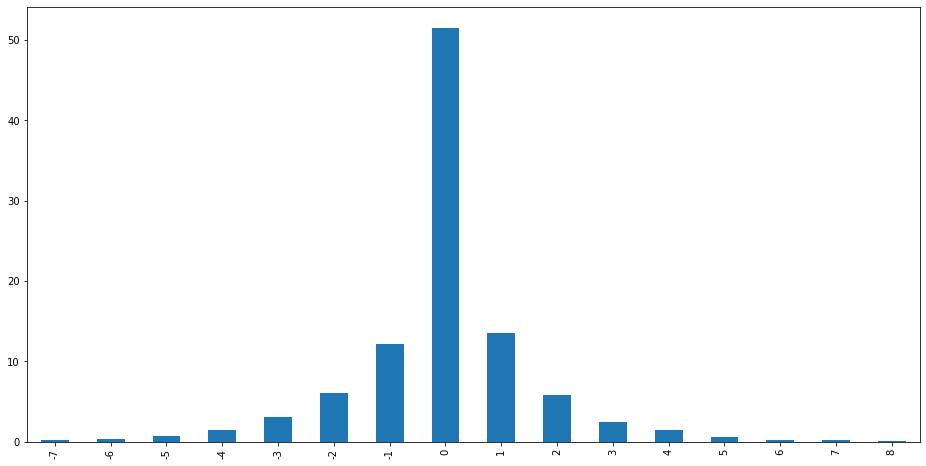

In [13]:
(win['Count'].value_counts(normalize = True) * 100).sort_index().plot.bar(figsize = [16,8]);

It is easy to notice the big difference in the counting of candles. The candles don't repeat the direction in more than 50% of the time.
This result corroborated with the idea that the stock market is a random walk.<br/><br/>
It is possible to notice that the chance to repeat the direction once is around 15.77%, and the chance to repeat twice is 11.90%. The percentages only decrease when the number of repetitions increases.<br/><br/>
Let's try to create a trading system using the knowledge that we just gained.

## Trading system

In this trading system should buy after a negative day and sell after a positive day. Because the Brazilian mini index has a bunch of gaps the operation should start with the `Open` price and finish with the `Close` price of the next day.<br/><br/>
First step is to mark every day as buy or sell.

In [14]:
win['Operation'] = win['Direction'].apply(lambda direction: ('Buy' if direction == 'Negative'
                                                              else 'Sell' if direction == 'Positive'
                                                              else 'Nothing'
                                                            )
                                         )
win['Operation'] = win['Operation'].shift()
win['Operation'].fillna('Nothing', inplace = True)

win.head()

,Date,Open,Close,Direction,Count,Operation
0,2014.10.20,76665,76172,Negative,0,Nothing
1,2014.10.21,73039,72941,Negative,-1,Buy
2,2014.10.22,72628,72448,Negative,-2,Buy
3,2014.10.23,71873,70022,Negative,-3,Buy
4,2014.10.24,70547,71398,Positive,0,Buy


Second step is to create the target which will be the `Close` price minus the `Open` price.

In [15]:
win['Target'] = win['Close'] - win['Open']

win.head()

,Date,Open,Close,Direction,Count,Operation,Target
0,2014.10.20,76665,76172,Negative,0,Nothing,-493
1,2014.10.21,73039,72941,Negative,-1,Buy,-98
2,2014.10.22,72628,72448,Negative,-2,Buy,-180
3,2014.10.23,71873,70022,Negative,-3,Buy,-1851
4,2014.10.24,70547,71398,Positive,0,Buy,851


Now is possible to see the result.

In [16]:
win[win.Operation == 'Buy']['Target'].sum()

40233

In [17]:
win[win.Operation == 'Sell']['Target'].sum() * -1

36421

The result looks good! It is necessary to notice that for `Sell` operations is necessary to multiply the result for -1 because when the operation is a `Sell` the profit only happens if the price decrease and to sum it is necessary to do this multiplication.<br/><br/>
Another important point is that the result is the number of points and not currency value.

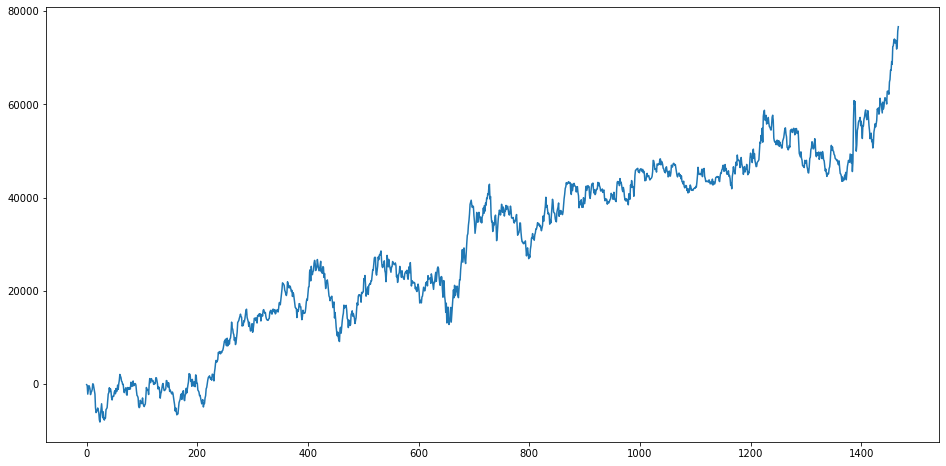

In [20]:
df = pd.DataFrame(pd.concat([win[win.Operation == 'Buy']['Target'], (win[win.Operation == 'Sell']['Target'] * -1)]))
df.reset_index(drop = True, inplace = True)
df.cumsum().plot(legend = False , figsize = [16, 8]);

The result visually looks good, but there are some problems. One problem is the drawdown after position 400, it is quite steep.<br/><br/>
Is the result really good?<br/>
In the end, the profit in more than 6 years was `76,654` points which are in Brazilian currency `R$ 15,330`. This result is operating one contract.

Let's evaluate now the initial result where we have the frequency percentage of candles.

In [22]:
win['Count_Abs'] = abs(win['Count'])
round(win['Count_Abs'].value_counts(normalize = True) * 100, 2)

0    51.53
1    25.76
2    11.90
3     5.57
4     2.86
5     1.22
6     0.61
7     0.48
8     0.07
Name: Count_Abs, dtype: float64

Here it ignores if the number of candles are positive or negative and uses the absolute value. With this information is possible to see what is the probability to have 1, 2, 3, ... candles doesn't matter the direction.<br/><br/>
The previous trade system buys or sells ignoring this probability. Looking to the result above is possible to see, for example, that after a positive candle has `51.53%` to the next to be a negative one, but after two positive candle this probability increases to 74.24% and this probability just increase when it has more positive candles in sequence.<br/><br/>
Because the probability to have an opposite direction to the current when the `Count` is higher we can try to improve the trading system. If the `Count` is 0 then it operates 1 contract, if it is 1 then operates 2 contacts, if it is 2 then operates 3 contracts, and so on. It has to use always the d-1 (previous `Count`) to evaluate the number of contracts.

In [23]:
win['Contracts'] = abs(win['Count'].shift()) + 1
win.head(10)

,Date,Open,Close,Direction,Count,Operation,Target,Count_Abs,Contracts
0,2014.10.20,76665,76172,Negative,0,Nothing,-493,0,NaN
1,2014.10.21,73039,72941,Negative,-1,Buy,-98,1,1.0
2,2014.10.22,72628,72448,Negative,-2,Buy,-180,2,2.0
3,2014.10.23,71873,70022,Negative,-3,Buy,-1851,3,3.0
4,2014.10.24,70547,71398,Positive,0,Buy,851,0,4.0
5,2014.10.27,66160,70153,Positive,1,Sell,3993,1,1.0
6,2014.10.28,70535,71950,Positive,2,Sell,1415,2,2.0
7,2014.10.29,71259,71129,Negative,0,Sell,-130,0,3.0
8,2014.10.30,71423,72386,Positive,0,Buy,963,0,1.0
9,2014.10.31,73614,75829,Positive,1,Sell,2215,1,1.0


Let's see the result using contracts.

In [27]:
buy = win[win.Operation == 'Buy'].copy()
buy['Result'] = buy['Target'] * buy['Contracts']
buy['Result'].sum()

67369.0

In [32]:
sell = win[win.Operation == 'Sell'].copy()
sell['Result'] = sell['Target'] * -1 * sell['Contracts']
sell['Result'].sum()

164815.0

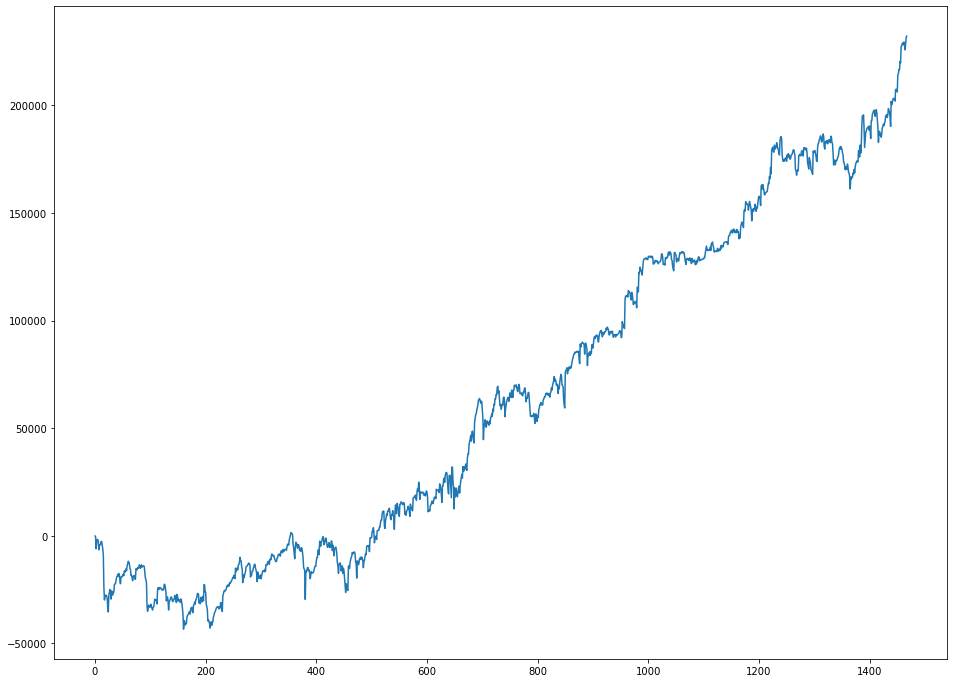

In [39]:
df = pd.DataFrame(pd.concat([buy['Result'], sell['Result']]))
df.reset_index(drop = True, inplace = True)
df.cumsum().plot(legend = False , figsize = [16, 12]);

The result looks even better, but we have more problems with the drawdown.<br/><br/>
The final result was `232,184` points which are in Brazilian currency `R$ 46,436`. The result is around 3 times better than the first one.<br/><br/>
For sure it is a too simple strategy that can't be applied and need more study mainly in the drawdowns, but the idea of candle's frequency probability is really good and can be used to create a professional and profitable trade strategy.